In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | crab hill
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | kysyl-syr
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | eseka
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | vardo
Processing Record 18 of Set 1 | coxim
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 of Set 1 | staryy nadym
Processing Recor

Processing Record 37 of Set 4 | porto novo
Processing Record 38 of Set 4 | hilo
Processing Record 39 of Set 4 | askiz
Processing Record 40 of Set 4 | tual
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | kulob
Processing Record 43 of Set 4 | asau
Processing Record 44 of Set 4 | cayenne
Processing Record 45 of Set 4 | ust-omchug
Processing Record 46 of Set 4 | bac lieu
Processing Record 47 of Set 4 | timbiqui
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | ban tak
Processing Record 50 of Set 4 | svetlyy
Processing Record 1 of Set 5 | hualmay
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | wanning
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | opuwo
Processing Record 6 of Set 5 | camacha
Processing Record 7 of Set 5 | sain alto
Processing Record 8 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 5 | langsa
Processing Record 10 of Set 5 | los llanos de 

Processing Record 28 of Set 8 | catamarca
Processing Record 29 of Set 8 | barra do garcas
Processing Record 30 of Set 8 | vila franca do campo
Processing Record 31 of Set 8 | rassvet
Processing Record 32 of Set 8 | george
Processing Record 33 of Set 8 | jorochito
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | gazanjyk
Processing Record 36 of Set 8 | toliary
City not found. Skipping...
Processing Record 37 of Set 8 | hadrut
Processing Record 38 of Set 8 | cockburn town
Processing Record 39 of Set 8 | puerto el triunfo
Processing Record 40 of Set 8 | ternate
Processing Record 41 of Set 8 | freeport
Processing Record 42 of Set 8 | nantucket
Processing Record 43 of Set 8 | cairns
Processing Record 44 of Set 8 | verkhoyansk
Processing Record 45 of Set 8 | schruns
Processing Record 46 of Set 8 | kununurra
Processing Record 47 of Set 8 | sabha
Processing Record 48 of Set 8 | pasighat
Processing Record 49 of Set 8 | vanavara
Processing Record 50 of Set 8 | scottsbluff


Processing Record 17 of Set 12 | frontera
Processing Record 18 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 19 of Set 12 | quipapa
Processing Record 20 of Set 12 | mikuni
Processing Record 21 of Set 12 | sisimiut
Processing Record 22 of Set 12 | praia
Processing Record 23 of Set 12 | ugoofaaru
Processing Record 24 of Set 12 | kabinda
Processing Record 25 of Set 12 | biltine
Processing Record 26 of Set 12 | luena
Processing Record 27 of Set 12 | jawa
Processing Record 28 of Set 12 | mamburao
Processing Record 29 of Set 12 | praia da vitoria
Processing Record 30 of Set 12 | kimbe
Processing Record 31 of Set 12 | halalo
City not found. Skipping...
Processing Record 32 of Set 12 | yei
Processing Record 33 of Set 12 | toulepleu
City not found. Skipping...
Processing Record 34 of Set 12 | orlik
Processing Record 35 of Set 12 | sinnamary
Processing Record 36 of Set 12 | nongstoin
Processing Record 37 of Set 12 | menongue
Processing Record 38 of Set 12 | grindavik
Processi

In [8]:
len(city_data)

565

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,46.42,75,40,16.11,CL,2021-07-19 18:14:25
1,Severo-Kurilsk,50.6789,156.1250,49.91,96,97,8.39,RU,2021-07-19 18:15:07
2,Sitka,57.0531,-135.3300,62.49,72,20,3.44,US,2021-07-19 18:12:11
3,Sao Filipe,14.8961,-24.4956,75.36,83,21,8.55,CV,2021-07-19 18:15:08
4,Kysyl-Syr,63.8986,122.7617,56.12,93,100,4.47,RU,2021-07-19 18:15:08
5,Albany,42.6001,-73.9662,81.81,72,93,4.85,US,2021-07-19 18:12:11
6,Eseka,3.6500,10.7667,72.63,98,48,3.09,CM,2021-07-19 18:15:08
7,Atuona,-9.8000,-139.0333,77.76,70,21,25.10,PF,2021-07-19 18:15:08
8,New Norfolk,-42.7826,147.0587,48.92,71,98,5.01,AU,2021-07-19 18:15:09
9,Ushuaia,-54.8000,-68.3000,46.06,57,40,1.14,AR,2021-07-19 18:14:16


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-07-19 18:14:25,-53.1500,-70.9167,46.42,75,40,16.11
1,Severo-Kurilsk,RU,2021-07-19 18:15:07,50.6789,156.1250,49.91,96,97,8.39
2,Sitka,US,2021-07-19 18:12:11,57.0531,-135.3300,62.49,72,20,3.44
3,Sao Filipe,CV,2021-07-19 18:15:08,14.8961,-24.4956,75.36,83,21,8.55
4,Kysyl-Syr,RU,2021-07-19 18:15:08,63.8986,122.7617,56.12,93,100,4.47
5,Albany,US,2021-07-19 18:12:11,42.6001,-73.9662,81.81,72,93,4.85
6,Eseka,CM,2021-07-19 18:15:08,3.6500,10.7667,72.63,98,48,3.09
7,Atuona,PF,2021-07-19 18:15:08,-9.8000,-139.0333,77.76,70,21,25.10
8,New Norfolk,AU,2021-07-19 18:15:09,-42.7826,147.0587,48.92,71,98,5.01
9,Ushuaia,AR,2021-07-19 18:14:16,-54.8000,-68.3000,46.06,57,40,1.14


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

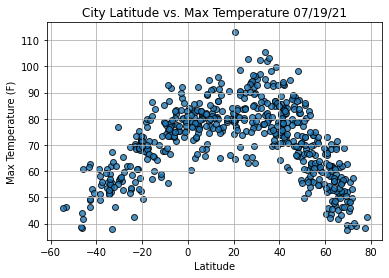

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

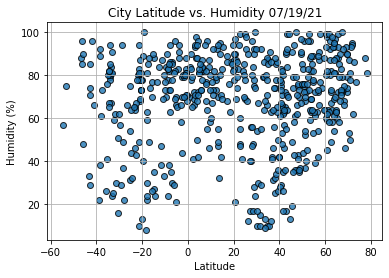

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

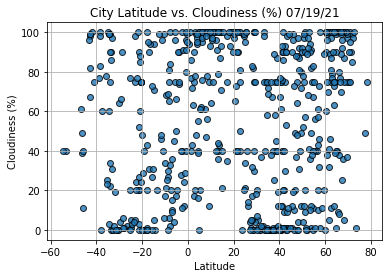

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

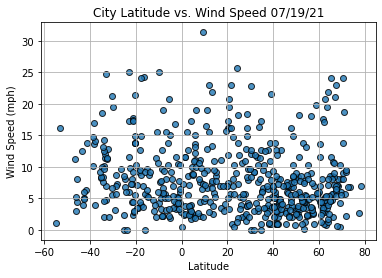

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()